# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier

# Read in CSV

In [2]:
df = pd.read_csv(CSV_FILE_URL)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Clean the Data

In [3]:
# Drop the null columns 
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

(284807, 31)

There are no null values

# Data Exploration

In [4]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


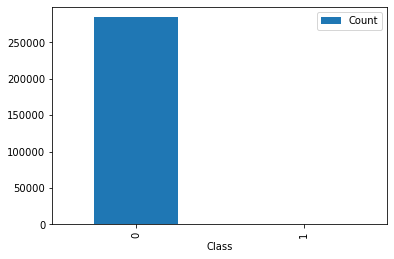

In [5]:
grouped_df = df[['Class', 'Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={'Time':"Count"})
grouped_df.plot(kind='bar')

We can see from the plot above that the data is highly imbalanced. There are only 492 fraudulent out of 284,315 transactions, or 0.17%.



# Defining Features

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [8]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1,1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


# Create a Train Test Split

In [9]:
# Using sklearn's 'train_test_split' to split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (213605, 30) (213605, 1) (71202, 30) (71202, 1)


# Data Pre-processing

In [10]:
# Scale the data
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Train the Model

In [11]:
gradientBoostedTree = GradientBoostingClassifier()
gradientBoostedTree

GradientBoostingClassifier()

In [12]:
gradientBoostedTree.fit(X_train_scaled, y_train.flatten())

GradientBoostingClassifier()

In [13]:
print(f"Training Data Score: {gradientBoostedTree.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {gradientBoostedTree.score(X_test_scaled, y_test)}")

Training Data Score: 0.9985814938788886
Testing Data Score: 0.9984410550265442


In [14]:
# Make predictions with the model
gradientBoostedPredictions = gradientBoostedTree.predict(X_test_scaled)

In [15]:
gradientBoostedPredictProba = gradientBoostedTree.predict_proba(X_test_scaled)[:,1]

In [16]:
# Print classification report
print(classification_report(y_test.flatten(), gradientBoostedPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(y_test.flatten(), gradientBoostedPredictions))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.52      0.20      0.29       113

      accuracy                           1.00     71202
     macro avg       0.76      0.60      0.65     71202
  weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.9984410550265442


Gradient Boosting Classifier
Accuracy:  0.9984410550265442
Precision:  0.5227272727272727
Recall:  0.20353982300884957
F1-Score:  0.2929936305732484
AUC score:  0.6016222093282794
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.52      0.20      0.29       113

      accuracy                           1.00     71202
     macro avg       0.76      0.60      0.65     71202
  weighted avg       1.00      1.00      1.00     71202



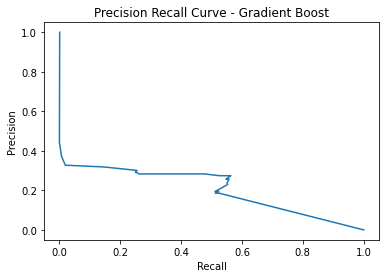

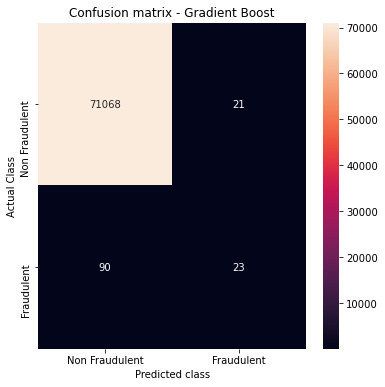

In [17]:
print("Gradient Boosting Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gradientBoostedPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gradientBoostedPredictions))
print("Recall: ",recall_score(y_test.flatten(), gradientBoostedPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gradientBoostedPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gradientBoostedPredictions))
print(classification_report(y_test.flatten(), gradientBoostedPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gradientBoostedPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boost')

confusionMatrix = confusion_matrix(y_test.flatten(), gradientBoostedPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boost") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

# Hyperparameter tuning

In [18]:
gradientBoostedTree.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [21]:
gradientBoostedParamGrid = {#'loss': ['deviance', 'exponential'],
                           'n_estimators': [100, 200, 300, 400],
                           'max_depth': [1,2]}
gradientBoostedGrid = GridSearchCV(gradientBoostedTree, gradientBoostedParamGrid, verbose=3)

In [22]:
# Train the model with GridSearch
gradientBoostedGrid.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=1, n_estimators=100, score=0.999, total= 3.5min
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s


[CV] ....... max_depth=1, n_estimators=100, score=0.999, total= 3.4min
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.9min remaining:    0.0s


[CV] ....... max_depth=1, n_estimators=100, score=0.999, total= 3.0min
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.999, total= 2.9min
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.999, total= 8.1min
[CV] max_depth=1, n_estimators=200 ...................................
[CV] ....... max_depth=1, n_estimators=200, score=0.999, total= 2.6min
[CV] max_depth=1, n_estimators=200 ...................................
[CV] ....... max_depth=1, n_estimators=200, score=0.999, total= 2.6min
[CV] max_depth=1, n_estimators=200 ...................................
[CV] ....... max_depth=1, n_estimators=200, score=0.999, total= 2.6min
[CV] max_depth=1, n_estimators=200 ...................................
[CV] ....... max_depth=1, n_estimators=200, score=0.999, total=43.2min
[CV] max_depth=1, n_estimators=200 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 979.4min finished


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=3)

In [23]:
print(gradientBoostedGrid.best_params_)
print(gradientBoostedGrid.best_score_)

{'max_depth': 1, 'n_estimators': 100}
0.9990964630977739


In [25]:
# Make predictions with hyperparameter tuned model
GradientBoostGridPredictions = gradientBoostedGrid.predict(X_test_scaled)

In [26]:
# Print Classification Report
print(classification_report(y_test.flatten(), GradientBoostGridPredictions,
                           target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.69      0.72      0.70       113

      accuracy                           1.00     71202
     macro avg       0.84      0.86      0.85     71202
  weighted avg       1.00      1.00      1.00     71202



In [28]:
hypertunedGradientBoostModel = GradientBoostingClassifier(max_depth = 1, n_estimators =100)
hypertunedGradientBoostModel

GradientBoostingClassifier(max_depth=1)

In [29]:
hypertunedGradientBoostModel.fit(X_train_scaled, y_train.flatten())

GradientBoostingClassifier(max_depth=1)

In [30]:
print(f"Training Data Score: {hypertunedGradientBoostModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {hypertunedGradientBoostModel.score(X_test_scaled, y_test)}")

Training Data Score: 0.9991105077128344
Testing Data Score: 0.9990309260975815


In [31]:
hypertunedGradientBoostModelPredictions = hypertunedGradientBoostModel.predict(X_test_scaled)

In [32]:
hypertunedGradientBoostPredictProba = hypertunedGradientBoostModel.predict_proba(X_test_scaled)[:,1]

In [33]:
# Calculate classification report
print(classification_report(y_test.flatten(), hypertunedGradientBoostModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.69      0.72      0.70       113

      accuracy                           1.00     71202
     macro avg       0.84      0.86      0.85     71202
  weighted avg       1.00      1.00      1.00     71202



Gradient Boosting Classifier
Accuracy:  0.9990309260975815
Precision:  0.6864406779661016
Recall:  0.7168141592920354
F1-Score:  0.7012987012987013
AUC score:  0.8581468424785234
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.69      0.72      0.70       113

      accuracy                           1.00     71202
     macro avg       0.84      0.86      0.85     71202
  weighted avg       1.00      1.00      1.00     71202



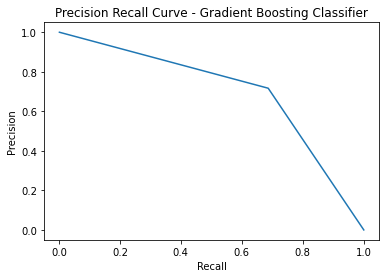

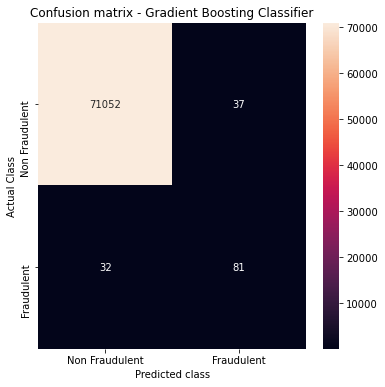

In [34]:
print("Gradient Boosting Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), hypertunedGradientBoostModelPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), hypertunedGradientBoostModelPredictions))
print("Recall: ",recall_score(y_test.flatten(), hypertunedGradientBoostModelPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), hypertunedGradientBoostModelPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), hypertunedGradientBoostModelPredictions))
print(classification_report(y_test.flatten(), hypertunedGradientBoostModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), hypertunedGradientBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), hypertunedGradientBoostModelPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

# Feature Selection

In [35]:
feature_names = selected_features.columns
sorted(zip(hypertunedGradientBoostModel.feature_importances_, feature_names), reverse=True)

[(1.0, 'V17'),
 (0.0, 'V9'),
 (0.0, 'V8'),
 (0.0, 'V7'),
 (0.0, 'V6'),
 (0.0, 'V5'),
 (0.0, 'V4'),
 (0.0, 'V3'),
 (0.0, 'V28'),
 (0.0, 'V27'),
 (0.0, 'V26'),
 (0.0, 'V25'),
 (0.0, 'V24'),
 (0.0, 'V23'),
 (0.0, 'V22'),
 (0.0, 'V21'),
 (0.0, 'V20'),
 (0.0, 'V2'),
 (0.0, 'V19'),
 (0.0, 'V18'),
 (0.0, 'V16'),
 (0.0, 'V15'),
 (0.0, 'V14'),
 (0.0, 'V13'),
 (0.0, 'V12'),
 (0.0, 'V11'),
 (0.0, 'V10'),
 (0.0, 'V1'),
 (0.0, 'Time'),
 (0.0, 'Amount')]

In [36]:
top_features = df[['V17']]

In [37]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

top_X = top_features
top_y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", top_X.shape, top_y.shape)

Shape:  (284807, 1) (284807, 1)


In [40]:
top_X_train, top_X_test, top_y_train, top_y_test = train_test_split(top_X, top_y, random_state=42)
print(top_X_train.shape,top_X_test.shape,top_y_train.shape, top_y_test.shape)


(213605, 1) (71202, 1) (213605, 1) (71202, 1)


In [41]:
top_X_minmax = MinMaxScaler().fit(top_X_train)

top_X_train_scaled = top_X_minmax.transform(top_X_train)
top_X_test_scaled = top_X_minmax.transform(top_X_test)

In [42]:
top_GradientBoostModel = GradientBoostingClassifier()
top_GradientBoostModel

GradientBoostingClassifier()

In [43]:
top_GradientBoostModel.fit(top_X_train_scaled, top_y_train.flatten())

GradientBoostingClassifier()

In [44]:
print(f"Training Data Score: {top_GradientBoostModel.score(top_X_train_scaled, top_y_train)}")
print(f"Testing Data Score: {top_GradientBoostModel.score(top_X_test_scaled, top_y_test)}")

Training Data Score: 0.999133915404602
Testing Data Score: 0.9990590151962023


In [46]:
# Make predictions
top_GradientBoostPredictions = top_GradientBoostModel.predict(top_X_test_scaled)

In [47]:
top_GradientBoostPredictProba = top_GradientBoostModel.predict_proba(top_X_test_scaled)[:,1]

In [48]:
print(classification_report(top_y_test.flatten(), top_GradientBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(top_y_test.flatten(), top_GradientBoostPredictions))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.72      0.67      0.69       113

      accuracy                           1.00     71202
     macro avg       0.86      0.84      0.85     71202
  weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.9990590151962023


Gradient Boosting Classifier
Accuracy:  0.9990590151962023
Precision:  0.7169811320754716
Recall:  0.672566371681416
F1-Score:  0.6940639269406392
AUC score:  0.8360721827319288
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.72      0.67      0.69       113

      accuracy                           1.00     71202
     macro avg       0.86      0.84      0.85     71202
  weighted avg       1.00      1.00      1.00     71202



NameError: name 'top_GradientBoostModelPredictions' is not defined

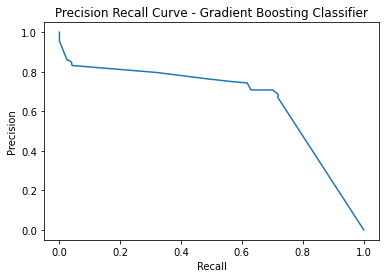

In [50]:
print("Gradient Boosting Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), top_GradientBoostPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), top_GradientBoostPredictions))
print("Recall: ",recall_score(y_test.flatten(), top_GradientBoostPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), top_GradientBoostPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), top_GradientBoostPredictions))
print(classification_report(y_test.flatten(), top_GradientBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), top_GradientBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), top_GradientBoostModelPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()